In [64]:
import numpy as np
import pandas as pd 
import datetime
from pandas import DataFrame
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
df = pd.read_csv ("C:/Users/Zoe.Gallos/OneDrive - ECS Europe Limited/Immersion Lab/CTRMasked.csv")
df.head()

,Connected-to-System,Agent,Department,CC-Brand,Service,Customer-Number,Calls,After Call Work (Mins),Avg Longest Hold (Mins),Hold Duration (Mins),Num of Holds,Work-Ratio,Queue-Duration,Interaction-Duration,Total-Calls,Calls-Served,Calls-Waiting
0,07/03/2019 14:31,Ramesh,Loans,Beta,core,4475807842,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1
1,07/03/2019 14:33,Ramesh,Loans,Beta,core,4475807842,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1
2,07/03/2019 14:36,Ramesh,Loans,Beta,core,4475807842,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1
3,07/03/2019 14:36,Ramesh,Loans,Beta,core,4475807842,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1
4,07/03/2019 14:39,Ramesh,Loans,Beta,core,4475807842,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1


In [65]:
df2=df.dropna()
date_time=pd.to_datetime(df2['Connected-to-System'], format='%d/%m/%Y %H:%M')
df2['date_time']=date_time
df2['date'] = df2['date_time'].dt.date
df2['time'] = df2['date_time'].dt.time
fcd=df2.groupby('date').count()[['Connected-to-System']]
fcd=fcd.reset_index()
fcd.iloc[43, 1]=45
df2.head()

C:\Users\Zoe.Gallos\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Zoe.Gallos\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Zoe.Gallos\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCo

,Connected-to-System,Agent,Department,CC-Brand,Service,Customer-Number,Calls,After Call Work (Mins),Avg Longest Hold (Mins),Hold Duration (Mins),Num of Holds,Work-Ratio,Queue-Duration,Interaction-Duration,Total-Calls,Calls-Served,Calls-Waiting,date_time,date,time
16,07/03/2019 15:20,John,AlphaBank-Core,Alpha,core,447519665,1,694.0,0.0,0.0,0.0,0.0518,13.0,36.0,1,1,0,2019-03-07 15:20:00,2019-03-07,15:20:00
20,07/03/2019 15:32,John,AlphaBank-Core,Alpha,core,447519665,1,4515.0,0.0,0.0,0.0,0.0026,26.0,12.0,1,1,0,2019-03-07 15:32:00,2019-03-07,15:32:00
35,07/03/2019 16:16,Jackie,BetaBank-Core,Beta,core,4475257530,1,13.0,6.0,6.0,1.0,0.1538,9.0,2.0,1,1,0,2019-03-07 16:16:00,2019-03-07,16:16:00
36,07/03/2019 16:27,Jackie,BetaBank-Core,Beta,core,4475257530,1,794.0,20.0,20.0,1.0,0.0025,9.0,2.0,1,1,0,2019-03-07 16:27:00,2019-03-07,16:27:00
39,07/03/2019 16:40,Darren,BetaBank-Core,Beta,core,4478936428,1,2637.0,0.0,0.0,0.0,0.0447,16.0,118.0,1,1,0,2019-03-07 16:40:00,2019-03-07,16:40:00


C:\Users\Zoe.Gallos\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


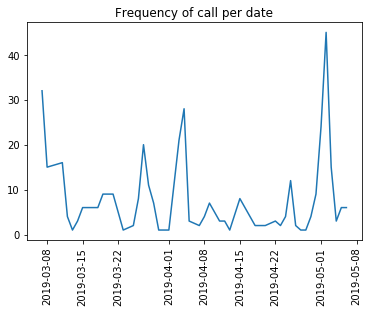

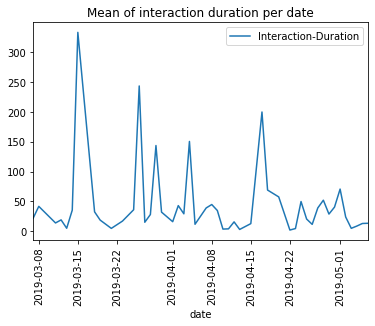

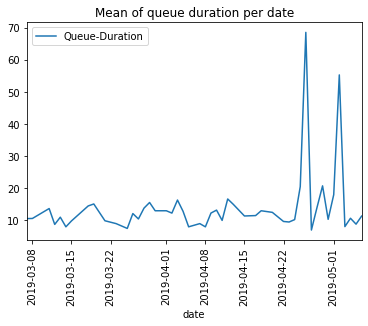

In [4]:
# Frequency of the call per date
fcdd=plt.plot(fcd['date'],fcd['Connected-to-System'])
fcdd=plt.xticks(rotation=90)
fcdd=plt.title("Frequency of call per date") 
midd=df2.groupby('date').mean()[['Interaction-Duration']].plot()
midd=plt.xticks(rotation=90)
midd=plt.title("Mean of interaction duration per date")
mqdd=df2.groupby('date').mean()[['Queue-Duration']].plot()
mqdd=plt.xticks(rotation=90)
mqdd=plt.title("Mean of queue duration per date")
fcdd=plt.show()
midd=plt.show()
mqdd=plt.show()

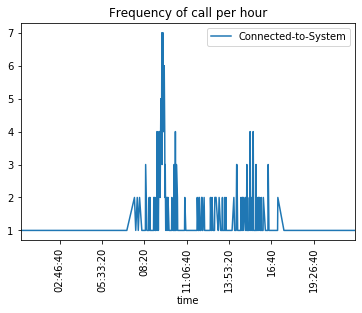

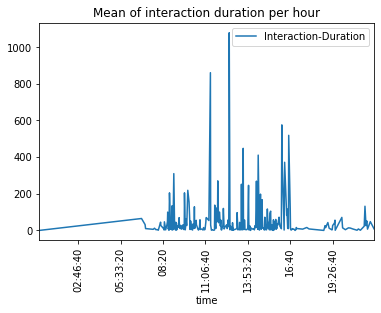

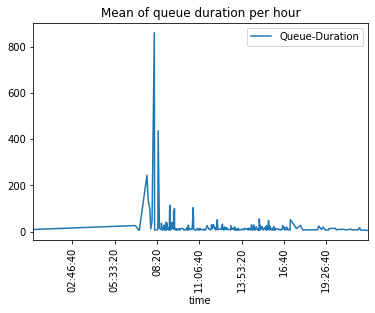

In [67]:
# Sump up of the call per hour
fch=df2.groupby('time').count()[['Connected-to-System']].plot()
fch=plt.xticks(rotation=90)
fch=plt.title("Frequency of call per hour") 
mih=df2.groupby('time').mean()[['Interaction-Duration']].plot()
mih=plt.xticks(rotation=90)
mih=plt.title("Mean of interaction duration per hour")
mqh=df2.groupby('time').mean()[['Queue-Duration']].plot()
mqh=plt.xticks(rotation=90)
mqh=plt.title("Mean of queue duration per hour")
fch=plt.show()
mih=plt.show()
mqh=plt.show()

In [69]:
conditions = [
    (df2['time'] < datetime.time(6,0)),
    (df2['time'] > datetime.time(5,59)) & (df2['time'] < datetime.time(7,0)),
    (df2['time'] > datetime.time(6,59)) & (df2['time'] < datetime.time(8,0)),
    (df2['time'] > datetime.time(7,59)) & (df2['time'] < datetime.time(9,0)),
    (df2['time'] > datetime.time(8,59)) & (df2['time'] < datetime.time(10,0)),
    (df2['time'] > datetime.time(9,59)) & (df2['time'] < datetime.time(11,0)),
    (df2['time'] > datetime.time(10,59)) & (df2['time'] < datetime.time(12,0)),
    (df2['time'] > datetime.time(11,59)) & (df2['time'] < datetime.time(13,0)),
    (df2['time'] > datetime.time(12,59)) & (df2['time'] < datetime.time(14,0)),
    (df2['time'] > datetime.time(13,59)) & (df2['time'] < datetime.time(15,0)),
    (df2['time'] > datetime.time(14,59)) & (df2['time'] < datetime.time(16,0)),
    (df2['time'] > datetime.time(15,59)) & (df2['time'] < datetime.time(17,0)),
    (df2['time'] > datetime.time(16,59)) & (df2['time'] < datetime.time(18,0)),
    (df2['time'] > datetime.time(17,59)) & (df2['time'] < datetime.time(19,0)),
    (df2['time'] > datetime.time(18,59))
    ]

#values = ['before 8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14','14-15','15-16','16-17','17-18','18-19',' after 19']
values = [datetime.time(5,0), datetime.time(6,0), datetime.time(7,0), datetime.time(8,0), datetime.time(9,0), datetime.time(10,0),datetime.time(11,0), datetime.time(12,0),datetime.time(13,0),
          datetime.time(14,0),datetime.time(15,0), datetime.time(16,0), datetime.time(17,0),datetime.time(18,0), datetime.time(19,0)]
df2['hour_group']=np.select(conditions, values)

# display updated DataFrame
df2.head()

C:\Users\Zoe.Gallos\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Connected-to-System,Agent,Department,CC-Brand,Service,Customer-Number,Calls,After Call Work (Mins),Avg Longest Hold (Mins),Hold Duration (Mins),...,Work-Ratio,Queue-Duration,Interaction-Duration,Total-Calls,Calls-Served,Calls-Waiting,date_time,date,time,hour_group
16,07/03/2019 15:20,John,AlphaBank-Core,Alpha,core,447519665,1,694.0,0.0,0.0,...,0.0518,13.0,36.0,1,1,0,2019-03-07 15:20:00,2019-03-07,15:20:00,15:00:00
20,07/03/2019 15:32,John,AlphaBank-Core,Alpha,core,447519665,1,4515.0,0.0,0.0,...,0.0026,26.0,12.0,1,1,0,2019-03-07 15:32:00,2019-03-07,15:32:00,15:00:00
35,07/03/2019 16:16,Jackie,BetaBank-Core,Beta,core,4475257530,1,13.0,6.0,6.0,...,0.1538,9.0,2.0,1,1,0,2019-03-07 16:16:00,2019-03-07,16:16:00,16:00:00
36,07/03/2019 16:27,Jackie,BetaBank-Core,Beta,core,4475257530,1,794.0,20.0,20.0,...,0.0025,9.0,2.0,1,1,0,2019-03-07 16:27:00,2019-03-07,16:27:00,16:00:00
39,07/03/2019 16:40,Darren,BetaBank-Core,Beta,core,4478936428,1,2637.0,0.0,0.0,...,0.0447,16.0,118.0,1,1,0,2019-03-07 16:40:00,2019-03-07,16:40:00,16:00:00


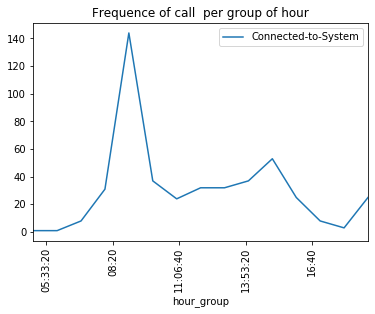

In [70]:
fh=df2.groupby('hour_group').count()[['Connected-to-System']].plot()
fh=plt.xticks(rotation=90)
fh=plt.title("Frequence of call  per group of hour") 
fh=plt.show()

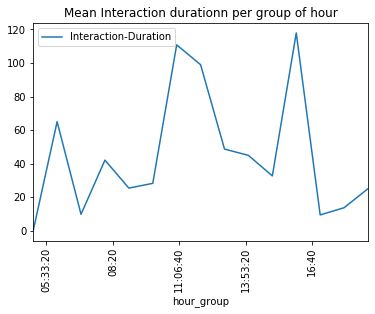

In [56]:
mh=df2.groupby('hour_group').mean()[['Interaction-Duration']].plot()
mh=plt.xticks(rotation=90)
mh=plt.title("Mean Interaction durationn per group of hour") 
mh=plt.show()

In [177]:
# fit model
model = ARIMA(fcd, order=(5,2,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                               ARIMA Model Results                                
Dep. Variable:     D2.Connected-to-System   No. Observations:                   46
Model:                     ARIMA(5, 2, 0)   Log Likelihood                -169.059
Method:                           css-mle   S.D. of innovations              9.367
Date:                    Wed, 11 Nov 2020   AIC                            352.118
Time:                            20:17:36   BIC                            364.918
Sample:                                 2   HQIC                           356.913
                                                                                  
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0808      0.345      0.235      0.816      -0.594       0.756
ar.L1.D2.Connected-to-System    -0.7892      

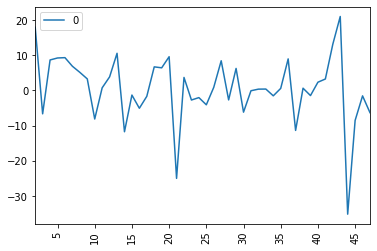

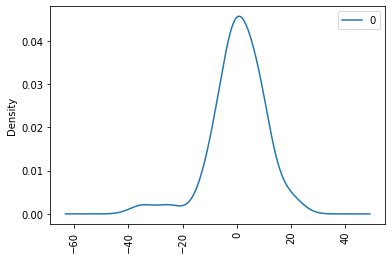

               0
count  46.000000
mean    0.536065
std     9.698300
min   -35.132325
25%    -2.717943
50%     0.602102
75%     6.617594
max    20.985401


In [178]:
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.xticks(rotation=90)
plt.show()

residuals.plot(kind='kde')
plt.xticks(rotation=90)
plt.show()

print(residuals.describe())

predicted=3.271667, expected=2.000000
predicted=-0.715015, expected=2.000000
predicted=1.707212, expected=3.000000
predicted=2.672426, expected=2.000000
predicted=1.909866, expected=4.000000
predicted=2.348977, expected=12.000000
predicted=8.620317, expected=2.000000
predicted=0.626060, expected=1.000000
predicted=-1.098337, expected=1.000000
predicted=2.688452, expected=4.000000
predicted=4.135805, expected=9.000000
predicted=7.482799, expected=24.000000
predicted=16.218326, expected=45.000000
predicted=42.495382, expected=15.000000
predicted=4.122744, expected=3.000000
predicted=1.154713, expected=6.000000
predicted=14.062689, expected=6.000000
Test MSE: 125.254


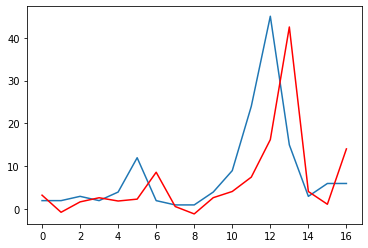

In [179]:
X = fcd.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range (len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit= model.fit(disp=0)
    output =model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs=test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error =mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

predicted=1.296000, expected=1.000000
predicted=1.278774, expected=1.000000
predicted=1.174619, expected=2.000000
predicted=1.577147, expected=1.000000
predicted=1.302531, expected=2.000000
predicted=1.420257, expected=1.000000
predicted=1.565625, expected=2.000000
predicted=1.491504, expected=1.000000
predicted=1.526876, expected=2.000000
predicted=1.478891, expected=1.000000
predicted=1.539096, expected=2.000000
predicted=1.466919, expected=1.000000
predicted=1.550699, expected=3.000000
predicted=1.710831, expected=1.000000
predicted=1.888694, expected=1.000000
predicted=1.346574, expected=1.000000
predicted=1.574000, expected=2.000000
predicted=1.293945, expected=1.000000
predicted=1.235045, expected=4.000000
predicted=1.926302, expected=1.000000
predicted=2.239870, expected=2.000000
predicted=1.695144, expected=1.000000
predicted=2.230757, expected=1.000000
predicted=1.184854, expected=1.000000
predicted=1.322903, expected=4.000000
predicted=1.735398, expected=1.000000
predicted=1.

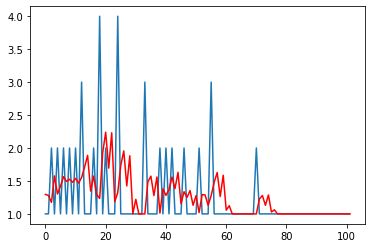

In [30]:
fctS=df2.groupby('time').count()[['Connected-to-System']]
X = fctS.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range (len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit= model.fit(disp=0)
    output =model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs=test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error =mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

predicted=110.628472, expected=198.000000
predicted=93.873517, expected=57.000000
predicted=119.709888, expected=9.000000
predicted=54.021578, expected=6.000000
predicted=62.329780, expected=43.500000
predicted=52.702489, expected=168.000000
predicted=88.218108, expected=12.000000
predicted=40.706401, expected=13.000000
predicted=43.299641, expected=2.000000
predicted=47.732554, expected=72.000000
predicted=46.063593, expected=41.500000
predicted=50.180765, expected=33.000000
predicted=27.717523, expected=5.666667
predicted=30.537197, expected=3.000000
predicted=23.276616, expected=4.000000
predicted=25.314756, expected=117.000000
predicted=40.995497, expected=11.000000
predicted=23.127432, expected=13.000000
predicted=24.692326, expected=43.750000
predicted=41.905482, expected=3.000000
predicted=22.173621, expected=94.000000
predicted=53.287591, expected=105.000000
predicted=50.037209, expected=2.000000
predicted=34.202320, expected=13.000000
predicted=49.010885, expected=31.750000
pr

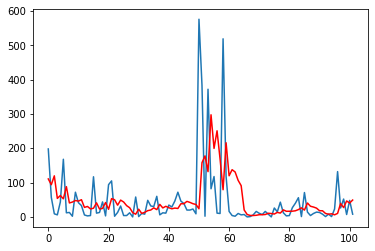

In [31]:
mit=df2.groupby('time').mean()[['Interaction-Duration']]
X = mit.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range (len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit= model.fit(disp=0)
    output =model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs=test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error =mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [51]:
conditions = [
    (df2['time'] < datetime.time(12,0)),
    (df2['time'] > datetime.time(11,59))
    ]
values = [0,1]
df2['hour_group']=np.select(conditions, values)

# display updated DataFrame
df2.head()

C:\Users\Zoe.Gallos\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Connected-to-System,Agent,Department,CC-Brand,Service,Customer-Number,Calls,After Call Work (Mins),Avg Longest Hold (Mins),Hold Duration (Mins),...,Work-Ratio,Queue-Duration,Interaction-Duration,Total-Calls,Calls-Served,Calls-Waiting,date_time,date,time,hour_group
16,07/03/2019 15:20,John,AlphaBank-Core,Alpha,core,447519665,1,694.0,0.0,0.0,...,0.0518,13.0,36.0,1,1,0,2019-03-07 15:20:00,2019-03-07,15:20:00,1
20,07/03/2019 15:32,John,AlphaBank-Core,Alpha,core,447519665,1,4515.0,0.0,0.0,...,0.0026,26.0,12.0,1,1,0,2019-03-07 15:32:00,2019-03-07,15:32:00,1
35,07/03/2019 16:16,Jackie,BetaBank-Core,Beta,core,4475257530,1,13.0,6.0,6.0,...,0.1538,9.0,2.0,1,1,0,2019-03-07 16:16:00,2019-03-07,16:16:00,1
36,07/03/2019 16:27,Jackie,BetaBank-Core,Beta,core,4475257530,1,794.0,20.0,20.0,...,0.0025,9.0,2.0,1,1,0,2019-03-07 16:27:00,2019-03-07,16:27:00,1
39,07/03/2019 16:40,Darren,BetaBank-Core,Beta,core,4478936428,1,2637.0,0.0,0.0,...,0.0447,16.0,118.0,1,1,0,2019-03-07 16:40:00,2019-03-07,16:40:00,1


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [52]:
y = df2['hour_group']
x=df2
x.drop(x.columns[[0,1,2,3,4,5,6,14,15,16,17,18,19,20]],axis=1,inplace=True)
X=x
#colhead=list(x.columns.values)
#print(colhead)

C:\Users\Zoe.Gallos\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X=x
X

,After Call Work (Mins),Avg Longest Hold (Mins),Hold Duration (Mins),Num of Holds,Work-Ratio,Queue-Duration,Interaction-Duration
16,694.0,0.0,0.0,0.0,0.0518,13.0,36.0
20,4515.0,0.0,0.0,0.0,0.0026,26.0,12.0
35,13.0,6.0,6.0,1.0,0.1538,9.0,2.0
36,794.0,20.0,20.0,1.0,0.0025,9.0,2.0
39,2637.0,0.0,0.0,0.0,0.0447,16.0,118.0
...,...,...,...,...,...,...,...
1678,3.0,0.0,0.0,0.0,6.3333,7.0,19.0
1679,4.0,0.0,0.0,0.0,14.3333,14.0,19.0
1680,2.0,0.0,0.0,0.0,6.0000,7.0,12.0
1681,3.0,0.0,0.0,0.0,4.3333,8.0,13.0


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=7,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
print(clf.predict([[0, 0, 0, 0, 0, 0, 0]]))

[1]


C:\Users\Zoe.Gallos\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [48]:
predictions =clf.predict(X_test)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

[[ 0 45]
 [ 0 48]]


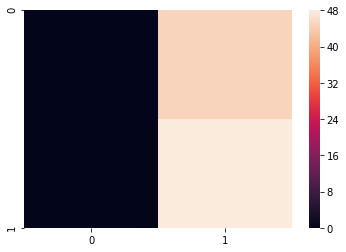

In [58]:
# Visualise classical Confusion Matrix
from sklearn.metrics import confusion_matrix
predictions =clf.predict(X_test)
labels=y_test
CM = confusion_matrix(labels, predictions)
print(CM)

# Visualize it as a heatmap
import seaborn
seaborn.heatmap(CM)
plt.show()